# HW1- Group: PyClass
Berkin Gürcan \
Yunus Emre Aydın \
Cansu Pirşen \
Murat Göğebakan 

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

# NFT History Sales

By now, you would have at least heard about NFT. If not, you would have heard about art which sold for $69 million. May be at-least record sales on NBA and with NFT. This got me curious, I started to research more on it recently by wearing my Data Scientist hat. Data Scientists follow when some numbers are there! In this article, I will share about NFT’s and how to get started.

Describe dataset

In [26]:
#Read Data
df = pd.read_csv (r'NFT_Sales.csv')

In [27]:
df.head()

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [28]:
#Finding number of NaN's
df.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    8
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          1
AverageUSD_cum                  1
Sales_USD                       1
Number_of_Sales                 1
Active_Market_Wallets           9
Primary_Sales                   1
dtype: int64

In [29]:
#Getting rid of NaN's

df['Active_Market_Wallets_cumsum'] = df['Active_Market_Wallets_cumsum'].fillna(df['Active_Market_Wallets_cumsum'].mean())
df['Active_Market_Wallets'] = df['Active_Market_Wallets'].fillna(df['Active_Market_Wallets'].mean())
df.loc[0, 'Active_Market_Wallets'] = 0 #Assigning the first element 0 in order to mean value
df = df.fillna(0)

In [30]:
#Dataframe after getting rid of NaN's

df

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.000000e+00,0,0.000000,0,0.0,0.00,0.000000e+00,0.0,0.000000,0.0
1,2017-06-23,1.020300e+03,19,8.000000,0,19.0,53.70,1.020300e+03,19.0,8.000000,0.0
2,2017-06-24,2.261140e+03,40,21.000000,0,21.0,56.53,1.240840e+03,21.0,13.000000,0.0
3,2017-06-25,2.778690e+03,53,28.000000,0,13.0,52.43,5.175500e+02,13.0,7.000000,0.0
4,2017-06-26,3.203320e+03,67,34.000000,0,14.0,47.81,4.246300e+02,14.0,6.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1601,2021-11-08,1.008803e+10,10913146,155847.829161,6541355,14829.0,924.39,7.706698e+07,59264.0,502.875391,44435.0
1602,2021-11-09,1.014001e+10,10964025,155847.829161,6573511,18723.0,924.84,5.197508e+07,50879.0,502.875391,32156.0
1603,2021-11-10,1.019902e+10,11008847,155847.829161,6601205,17128.0,926.44,5.901034e+07,44822.0,502.875391,27694.0
1604,2021-11-11,1.023456e+10,11022782,155847.829161,6609013,6127.0,928.49,3.554317e+07,13935.0,502.875391,7808.0


In [31]:
#Number of NaN's in the dataframe after getting rid of NaN's

df.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    0
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          0
AverageUSD_cum                  0
Sales_USD                       0
Number_of_Sales                 0
Active_Market_Wallets           0
Primary_Sales                   0
dtype: int64

In [ ]:
#Arranging dates for graphs

df['Date'] = pd.to_datetime(df['Date'])
dateData =  [x.strftime('%Y') for x in df['Date']]

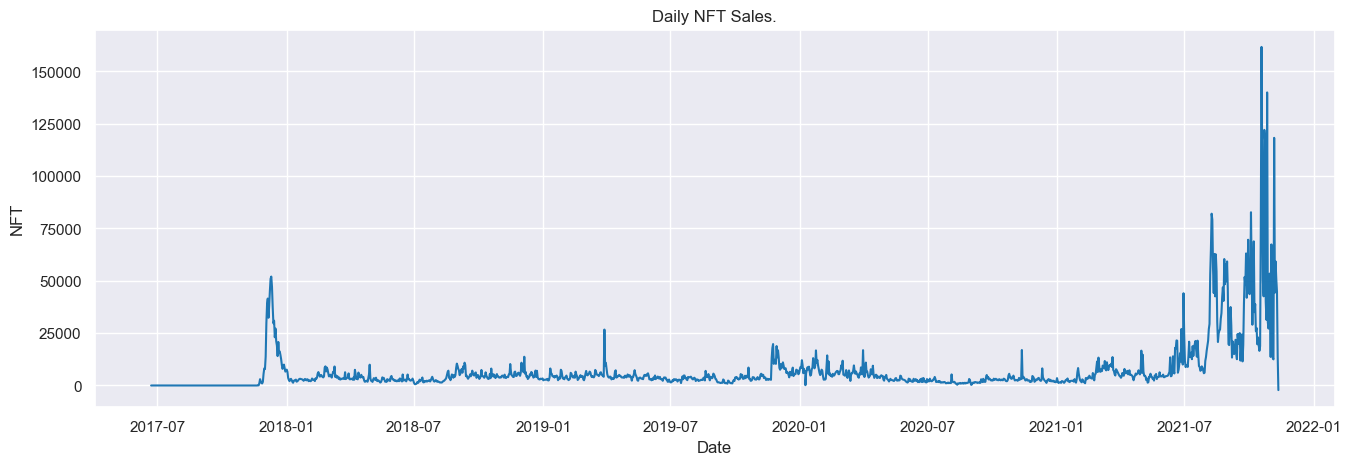

In [44]:
# Data visualization

df['Date'] = pd.to_datetime(df['Date'])
dateData =  [x.strftime('%Y') for x in df['Date']]
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.Date, df.Number_of_Sales, color='tab:blue')
plt.gca().set(title='Daily NFT Sales.', xlabel='Date', ylabel='NFT')
plt.show()

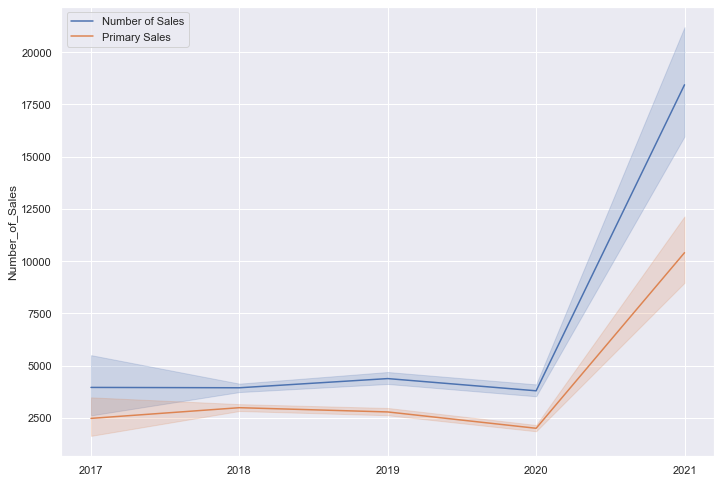

In [39]:
#Plot of Number of Sales vs. Primary Sales due to years

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df, x=dateData, y="Number_of_Sales", label="Number of Sales")
sns.lineplot(data=df, x=dateData, y="Primary_Sales", label="Primary Sales")
plt.legend(loc='upper left')
plt.show()

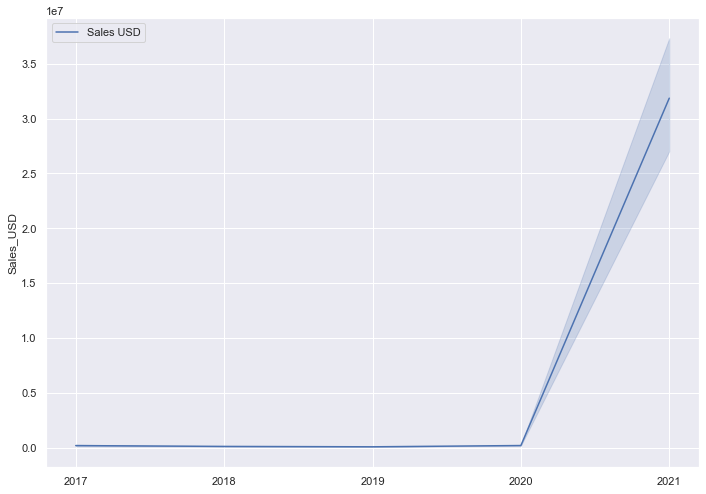

In [34]:
#Graph of USD Sales due to years

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df, x=dateData, y="Sales_USD")
plt.legend(labels=["Sales USD"],loc='upper left')
plt.show()

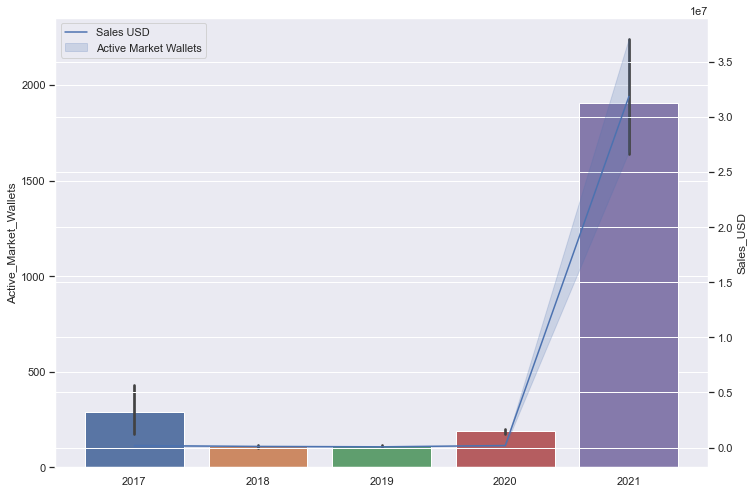

In [35]:
#Graphs of Avtive Market Wallets and USD Sales due to years

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data = df, x = dateData, y = "Active_Market_Wallets")
ax2 = ax.twinx()
ax2 = sns.lineplot(data = df, x = dateData, y = "Sales_USD")
plt.legend(labels=["Sales USD","Active Market Wallets"],loc='upper left')
plt.show()

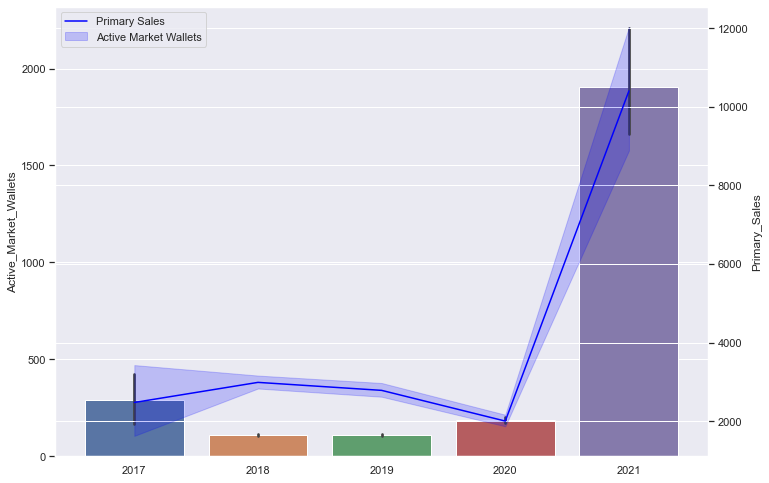

In [21]:
#Graphs of Avtive Market Wallets and Primary Sales due to years

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data = df, x = dateData, y = "Active_Market_Wallets")
ax2 = ax.twinx()
ax2 = sns.lineplot(data = df, x = dateData, y = "Primary_Sales", color = 'blue')
plt.legend(labels=["Primary Sales","Active Market Wallets"],loc='upper left')
plt.show()

# Ether Price History Dataset (USD)

In [22]:
#Reading Data

eth = pd.read_csv (r'ETH-USD.csv')
eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


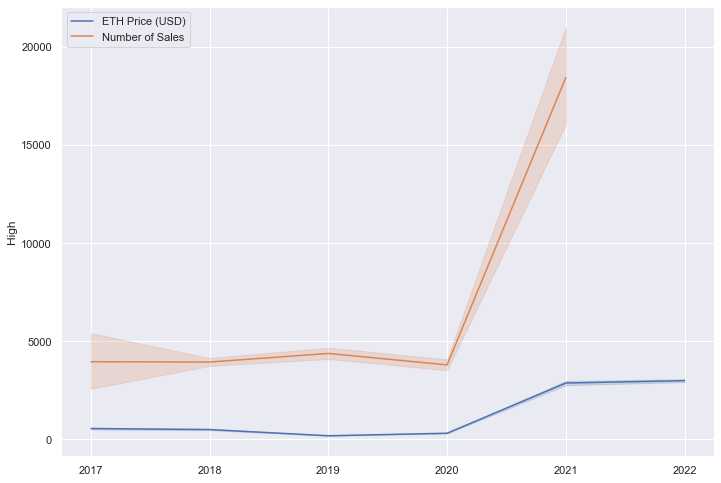

In [49]:
#Plof of ETH(USD) vs. Number of Sales

sns.set(rc={'figure.figsize':(11.7,8.27)})
eth['Date'] = pd.to_datetime(eth['Date'])
eth = eth[~(eth['Date'] < '2017-06-22')]
dateDataEth = [x.strftime('%Y') for x in eth['Date']]

sns.lineplot(data=eth, x=dateDataEth, y="High", label="ETH Price (USD)")
sns.lineplot(data=df, x=dateData, y="Number_of_Sales", label="Number of Sales")

plt.legend(loc='upper left')
plt.show()